<h2>Movies Rating predection</h2>

In [13]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df_movies = pd.read_csv('movies.txt', sep='::',names = ['MovieID', 'Title', 'Genres'] ,engine='python', encoding='latin-1')
df_ratings = pd.read_csv('ratings.dat', sep='::', names=['UserID', 'MovieID', 'Rating', 'Timestamp'], engine='python', encoding='latin-1')
df_users = pd.read_csv('users.dat', sep='::', names=['UserID', 'Gender','Age','Occupation','Zip-code'], engine='python', encoding='utf-8')

In [15]:
df_ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [16]:
df_movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [25]:
df_users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


<h3> Exploratory Data Analysis</h3>

In [26]:
# concatenate the three dataframes
df = pd.concat([df_ratings, df_movies, df_users], axis=1)
df.head()

,UserID,MovieID,Rating,Timestamp,MovieID,Title,Genres,UserID,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,1.0,Toy Story (1995),Animation|Children's|Comedy,1.0,F,1.0,10.0,48067
1,1,661,3,978302109,2.0,Jumanji (1995),Adventure|Children's|Fantasy,2.0,M,56.0,16.0,70072
2,1,914,3,978301968,3.0,Grumpier Old Men (1995),Comedy|Romance,3.0,M,25.0,15.0,55117
3,1,3408,4,978300275,4.0,Waiting to Exhale (1995),Comedy|Drama,4.0,M,45.0,7.0,02460
4,1,2355,5,978824291,5.0,Father of the Bride Part II (1995),Comedy,5.0,M,25.0,20.0,55455


<Axes: title={'center': 'Age Distribution'}, xlabel='Age', ylabel='Number of Users'>

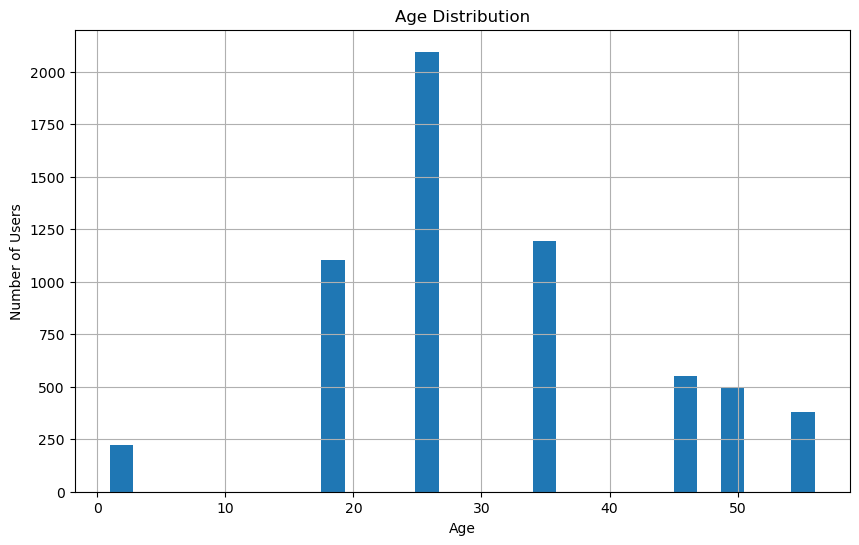

In [28]:
# draw a chart for the age distribution of the users
plt.figure(figsize=(10,6))
plt.title('Age Distribution')
plt.ylabel('Number of Users')
plt.xlabel('Age')
df['Age'].hist(bins=30)




<Axes: title={'center': 'Rating Distribution'}, xlabel='Rating', ylabel='Number of Ratings'>

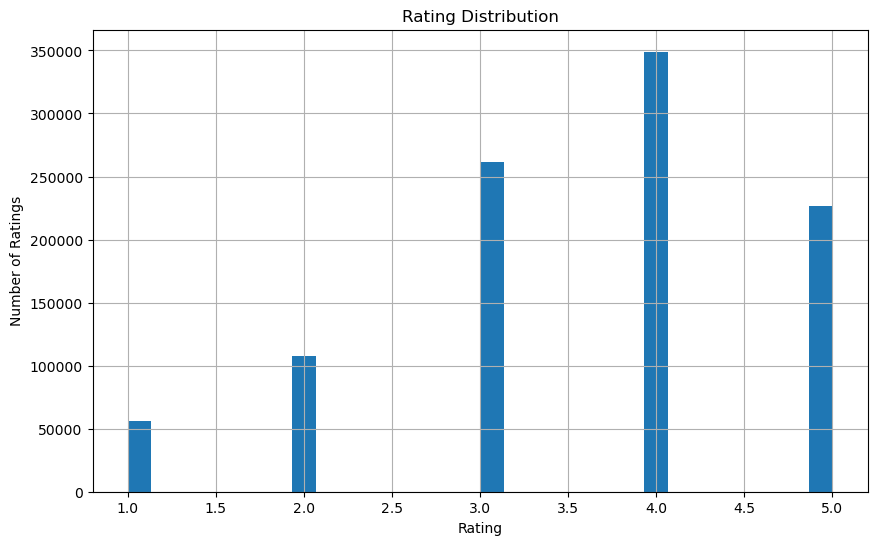

In [29]:
# draw a chart for the rating distribution
plt.figure(figsize=(10,6))
plt.title('Rating Distribution')
plt.ylabel('Number of Ratings')
plt.xlabel('Rating')
df['Rating'].hist(bins=30)

<Figure size 1000x600 with 0 Axes>

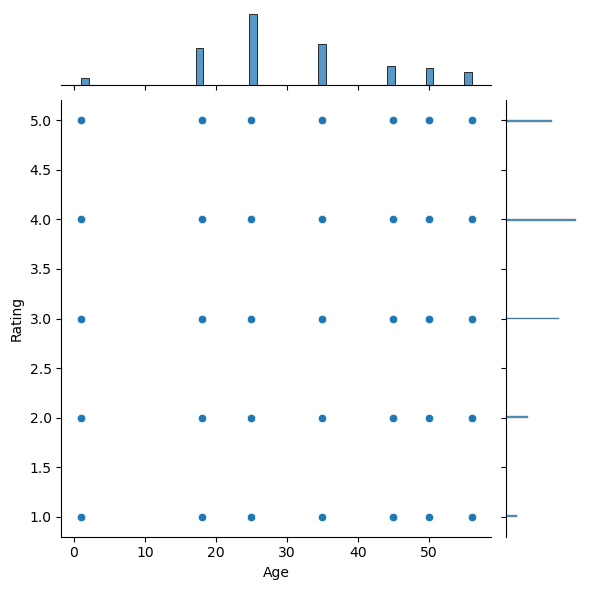

In [30]:
## find the correlation between the age and the rating and the type of the movie
plt.figure(figsize=(10,6))
sns.jointplot(x='Age', y='Rating', data=df)


conclusion: the data is clean and there is no missing values
the relation between the features and the target is not linear
the data is not balanced


In [41]:

# convert the catgeory of the movie to a numerical value
df['Genres'].unique()
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Genres'] = label_encoder.fit_transform(df['Genres'])

df['Genres'].unique()


array([145, 115, 207, 185, 176,  63, 106,   0,  37, 187, 196, 144, 239,
        29, 260, 252, 298,  47, 225, 258, 290, 138, 136, 161, 235, 262,
        57,   1, 234, 153,  71, 160, 248, 295,  46, 246, 222, 126,  92,
       111,  73,  16, 216, 249,  64, 255, 274,  10, 214,  28, 261,  84,
       228,  20, 112,  87,  33,  41, 278,  62, 300, 148, 167, 217, 241,
       244, 211, 289, 109,  24, 256,  56, 223,  39, 280, 162, 273,  50,
       159, 251, 210,  43, 118, 152, 180,  55,  86,  13, 178, 213, 279,
       286, 215, 263,  18,  54, 203, 204, 190,  66, 181, 271, 209,   8,
       163,   9,  61,   3, 146, 130,  17,   4,  76, 299,  27, 285,  23,
        98, 294, 236,  15, 229, 143,  31, 158, 155, 266, 297,  96, 177,
        90, 194, 264,  81, 201,  34, 168, 141, 282, 202, 205, 268, 281,
       113, 250, 291, 270, 227, 120,  32, 292,  74, 166, 107, 164, 116,
       101, 117, 226, 108, 169,  82, 142, 192, 154, 218,  21,  88,  95,
        40,  30,  77,  12,  49, 287, 269, 121,  11,  67, 206, 10

<Figure size 1000x600 with 0 Axes>

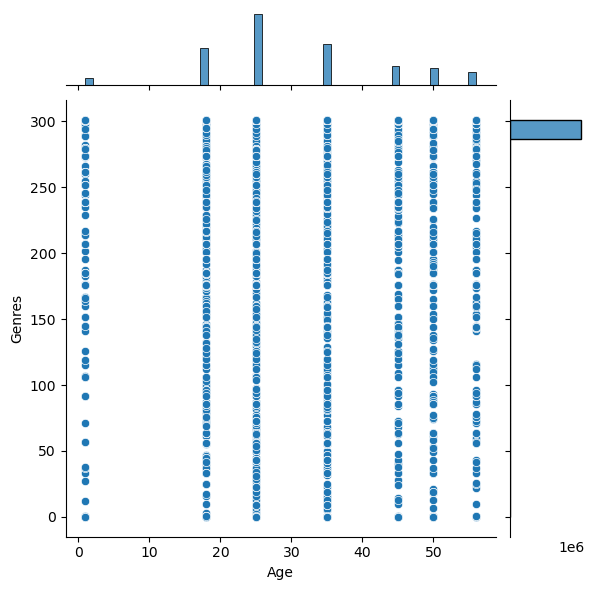

In [44]:
# find the realtrion between the age and the type of the movie
plt.figure(figsize=(10,6))
sns.jointplot(x='Age', y='Genres', data=df)


<h3> Data Preprocessing</h3>

In [64]:
# create a pipeline to train the model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('log_reg', LogisticRegression())
])

# split the data into training and testing data
from sklearn.model_selection import train_test_split

X = df[['Age', 'Genres','Occupation']]
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)
y_train.dropna(inplace=True)
y_test.dropna(inplace=True)
## take the min size of the both dataframes
min_size = min(len(X_train), len(y_train), len(X_test), len(y_test))
X_train = X_train[:min_size]
y_train = y_train[:min_size]
X_test = X_test[:min_size]
y_test = y_test[:min_size]
# train the model
pipeline.fit(X_train, y_train)

# test the model
y_pred = pipeline.predict(X_test)

# find the accuracy of the model
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)




0.3485099337748344

In [65]:
# SVM

from sklearn.svm import SVC

pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('svm', SVC())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

accuracy_score(y_test, y_pred)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

accuracy_score(y_test, y_pred)

# Random Forest

from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

accuracy_score(y_test, y_pred)

# KNN

from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

accuracy_score(y_test, y_pred)

# Naive Bayes

from sklearn.naive_bayes import GaussianNB

pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('nb', GaussianNB())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

accuracy_score(y_test, y_pred)

0.3443708609271523

In [70]:
# Neural Network

from sklearn.neural_network import MLPClassifier

pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('nn', MLPClassifier())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

accuracy_score(y_test, y_pred)

# Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('gb', GradientBoostingClassifier())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

accuracy_score(y_test, y_pred)


# find the best model
from sklearn.model_selection import cross_val_score

models = [
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    MLPClassifier(),
    GradientBoostingClassifier()
]

for model in models:
    pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
        ('model', model)
    ])
    scores = cross_val_score(pipeline, X_train, y_train, cv=10)
    print(model)
    print(scores.mean())




LogisticRegression()
0.32699035812672184
SVC()
0.331935261707989
DecisionTreeClassifier()
0.2781818181818182
RandomForestClassifier()
0.28729338842975205
KNeighborsClassifier()
0.285599173553719
GaussianNB()
0.3145523415977961


/Users/amraly/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/amraly/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/amraly/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/amraly/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/amraly/anaconda3/lib/pyth

MLPClassifier()
0.31040633608815427
GradientBoostingClassifier()
0.28065426997245174


ValueError: Invalid parameter 'learning_rate' for estimator Pipeline(steps=[('std_scaler', StandardScaler()),
                ('model', GradientBoostingClassifier())]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the pipeline with the StandardScaler and GradientBoostingClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Changed 'std_scaler' to 'scaler' for consistency
    ('model', GradientBoostingClassifier())
])

# Define the parameter grid
param_grid = {
    'model__n_estimators': [3, 10, 30],
    'model__max_features': [2, 4, 6, 8]
}

# Create the GridSearchCV instance
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best estimator
best_estimator = grid_search.best_estimator_

# Get the best cross-validated score
best_score = grid_search.best_score_

# Test the model on the test data
y_pred = best_estimator.predict(X_test)

# Calculate accuracy on the test data
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Best Parameters:", best_params)
print("Best Cross-Validated Score:", best_score)
print("Test Accuracy:", accuracy)


Best Parameters: {'model__max_features': 4, 'model__n_estimators': 10}
Best Cross-Validated Score: 0.33361338774390453
Test Accuracy: 0.347682119205298
